In [60]:
import os
import sys

# Get the path to the `src` directory
src_path = os.path.relpath('..')
sys.path.append(src_path)

from typing import List
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from src.types import *
from src.clustering.likelihood import LikelihoodClustering

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Path
data_path = os.path.relpath('../data/CAC40/FR_2007')

# Load data from a JSONL file
market = Market.loader('2007/03/01','2007/04/01', data_path)

100%|██████████| 46/46 [06:44<00:00,  8.79s/it]


In [11]:
period_length=1800
# Get periods of length 15
periods = market.get_periods_fast(period_length=period_length)
print(f"Number of periods: {len(periods)}")

100%|██████████| 8577796/8577796 [10:22<00:00, 13777.25it/s]


Number of periods: 351


In [63]:
population_size = {
    5*60: 4000,
    15*60: 1000,
    30*60: 800,
    60*60: 600
}

clustering = LikelihoodClustering().fit(periods, generations=10, population_size=population_size.get(period_length), num_clusters=len(periods)//10)

print('-' * 50)
clustering.summarize_clusters()
print('-' * 50)

Solving with PGA...: 100%|██████████| 10/10 [00:48<00:00,  4.82s/it]

Best solution : [26, 23, 27, 13, 32, 13, 31, 19, 15, 3, 24, 29, 28, 33, 0, 28, 6, 4, 15, 1, 13, 6, 8, 7, 34, 18, 14, 16, 22, 8, 12, 14, 0, 30, 29, 9, 23, 10, 19, 28, 20, 19, 1, 25, 21, 7, 16, 6, 12, 21, 4, 21, 22, 7, 23, 16, 26, 13, 20, 3, 34, 10, 22, 3, 18, 25, 27, 0, 12, 23, 23, 30, 20, 13, 25, 23, 30, 25, 8, 16, 14, 16, 31, 19, 25, 28, 7, 6, 30, 5, 18, 3, 28, 33, 17, 22, 10, 25, 22, 10, 28, 19, 6, 13, 5, 30, 12, 3, 6, 13, 26, 19, 22, 5, 7, 19, 23, 20, 29, 28, 17, 4, 22, 28, 31, 6, 22, 20, 9, 22, 6, 20, 0, 34, 6, 11, 17, 17, 19, 13, 29, 14, 26, 8, 3, 19, 8, 4, 0, 7, 7, 28, 10, 7, 25, 6, 17, 19, 31, 23, 16, 4, 14, 33, 29, 8, 14, 30, 23, 0, 33, 16, 10, 31, 11, 24, 21, 12, 7, 4, 25, 33, 27, 34, 17, 11, 8, 12, 5, 34, 34, 28, 25, 26, 3, 32, 33, 18, 14, 9, 16, 17, 4, 13, 29, 13, 3, 16, 12, 5, 4, 26, 34, 10, 2, 27, 21, 6, 26, 34, 6, 16, 26, 3, 18, 16, 5, 2, 29, 10, 27, 6, 31, 15, 8, 27, 5, 22, 17, 10, 33, 32, 9, 20, 14, 23, 6, 3, 21, 7, 33, 4, 10, 14, 2, 29, 10, 34, 24, 12, 6, 8, 18, 8, 34,

In [34]:
x = [27, 6, 24, 0, 0, 5, 30, 4, 17, 17, 5, 34, 10, 3, 2, 34, 22, 27, 24, 3, 7, 10, 22, 21, 15, 30, 30, 3, 21, 32, 11, 20, 24, 12, 23, 8, 27, 17, 12, 7, 7, 4, 12, 7, 34, 13, 12, 20, 4, 19, 16, 7, 24, 27, 20, 3, 26, 25, 24, 14, 20, 6, 0, 12, 13, 18, 6, 7, 30, 26, 14, 12, 1, 18, 4, 26, 29, 14, 18, 19, 22, 10, 9, 7, 25, 31, 9, 27, 7, 21, 15, 10, 13, 21, 31, 22, 1, 15, 22, 4, 24, 4, 24, 4, 5, 10, 14, 25, 9, 0, 11, 32, 24, 13, 23, 21, 18, 17, 29, 27, 13, 22, 13, 25, 24, 17, 6, 23, 25, 17, 23, 34, 22, 17, 10, 7, 28, 2, 8, 23, 24, 34, 20, 16, 31, 30, 10, 0, 27, 16, 27, 24, 15, 34, 22, 7, 33, 19, 32, 6, 21, 21, 9, 31, 7, 28, 32, 4, 7, 32, 20, 28, 27, 16, 20, 13, 27, 3, 34, 24, 22, 21, 21, 16, 19, 28, 33, 27, 3, 18, 25, 18, 15, 15, 25, 18, 34, 26, 6, 30, 26, 0, 3, 1, 29, 2, 1, 17, 27, 7, 9, 3, 5, 3, 34, 7, 14, 25, 25, 11, 2, 4, 11, 26, 1, 25, 12, 6, 23, 21, 21, 30, 32, 28, 27, 11, 26, 3, 13, 6, 18, 13, 17, 25, 18, 24, 2, 15, 27, 5, 18, 1, 33, 27, 28, 13, 24, 3, 19, 23, 26, 5, 22, 18, 13, 22, 20, 34, 0, 0, 26, 24, 18, 34, 23, 5, 20, 2, 4, 12, 18, 21, 2, 13, 22, 18, 19, 11, 0, 21, 15, 17, 18, 16, 29, 15, 0, 13, 13, 34, 14, 14, 4, 4, 34, 7, 22, 17, 21, 13, 16, 28, 5, 9, 14, 15, 27, 26, 2, 14, 26, 29, 31, 7, 28, 14, 27, 11, 3, 20, 0, 22, 25, 4, 1, 12, 26, 18, 23, 12, 2, 18, 3, 33, 10, 0, 4, 1, 17, 19, 2]
print("BinCount:", np.bincount(x), len(np.bincount(x)))
print(np.unique(x), len(np.unique(x)))

BinCount: [12  8 10 13 14  8  8 16  2  6  8  7 10 15 10 10  7 12 17  7 10 14 14  9
 15 12 12 17  8  5  7  5  6  4 13] 35
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34] 35


Count of periods per time:
08:00 : 20
08:30 : 20
09:00 : 21
09:30 : 21
10:00 : 21
10:30 : 21
11:00 : 21
11:30 : 21
12:00 : 21
12:30 : 21
13:00 : 21
13:30 : 21
14:00 : 21
14:30 : 21
15:00 : 21
15:30 : 21
16:00 : 16


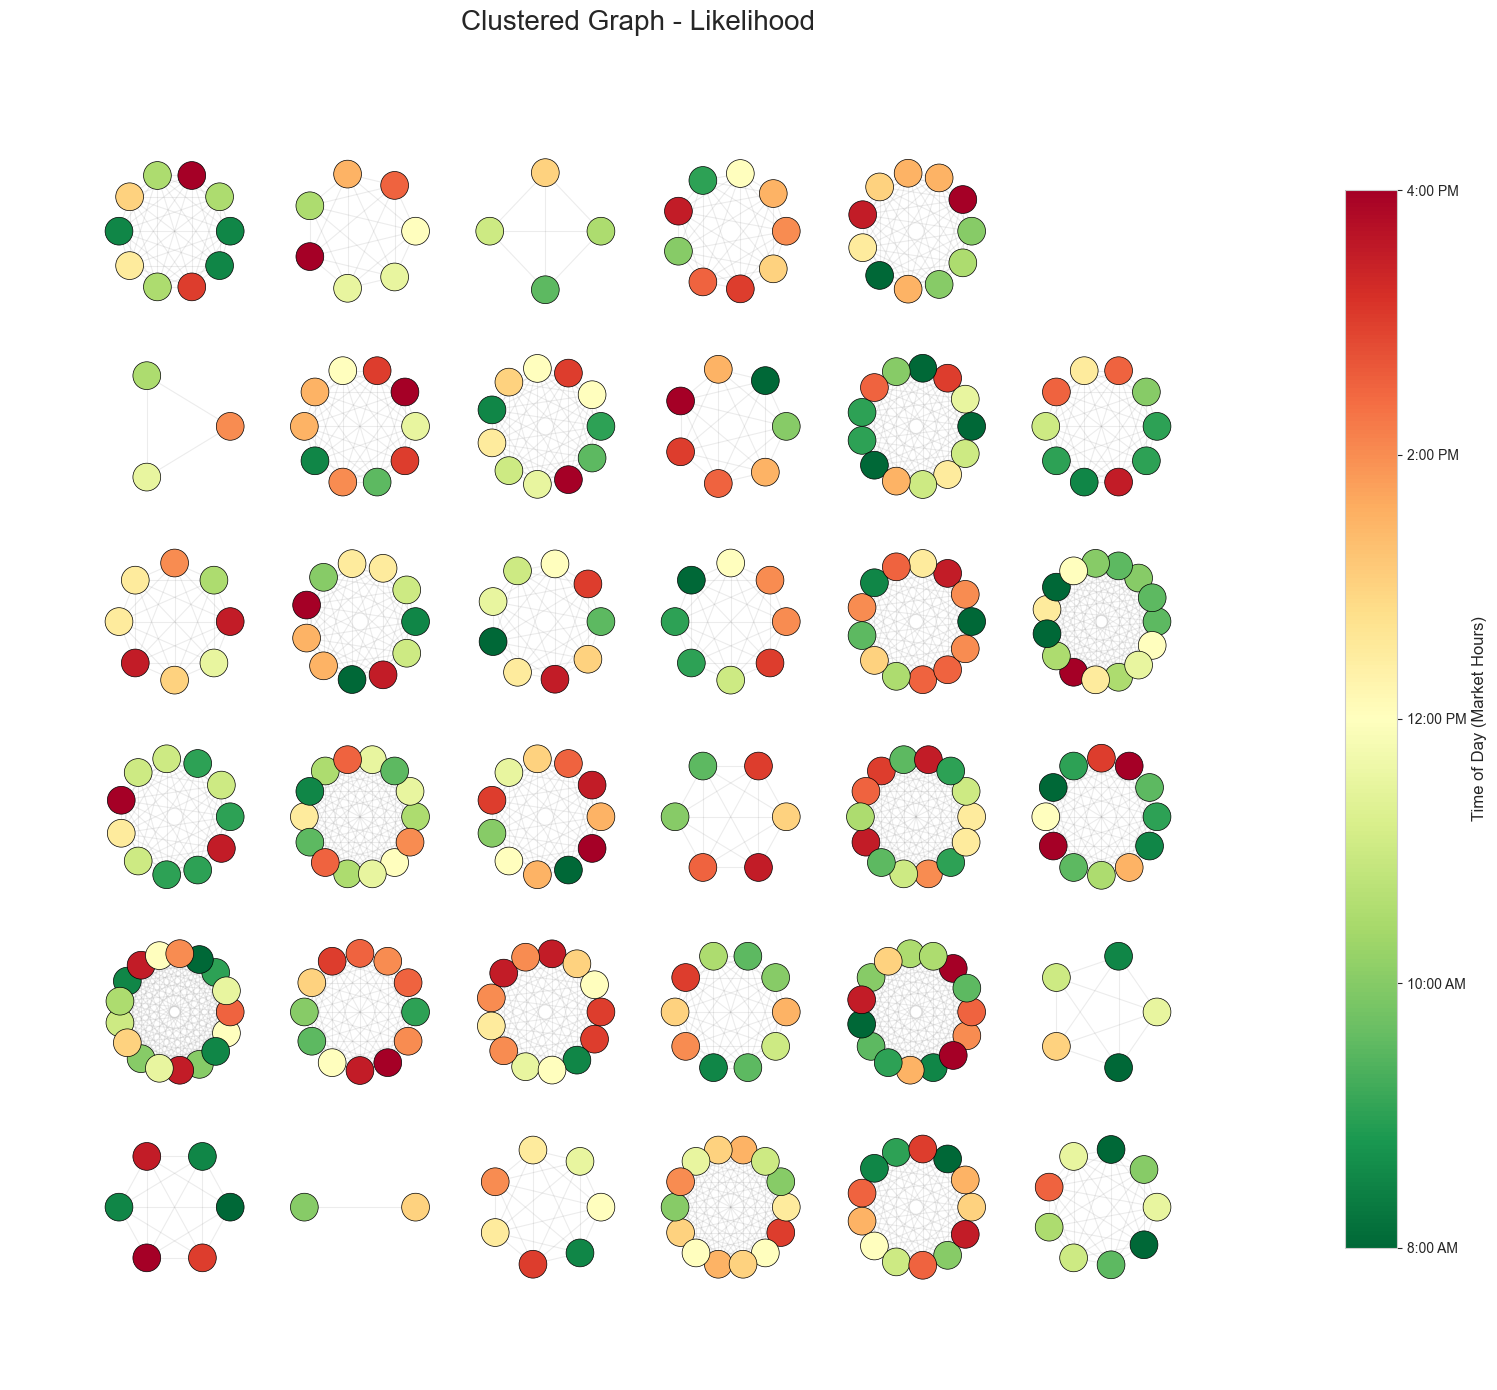

In [64]:
clustering.plot_cluster_2(method='Likelihood')

Clusters [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
Getting ssv for cluster: 0
SSV nan
Getting ssv for cluster: 1
SSV nan
Getting ssv for cluster: 2
SSV nan
Getting ssv for cluster: 3
SSV nan
Getting ssv for cluster: 4
SSV nan
Getting ssv for cluster: 5
SSV nan
Getting ssv for cluster: 6
SSV nan
Getting ssv for cluster: 7
SSV nan
Getting ssv for cluster: 8
SSV nan
Getting ssv for cluster: 9
SSV nan
Getting ssv for cluster: 10
SSV nan
Getting ssv for cluster: 11
SSV nan
Getting ssv for cluster: 12
SSV nan
Getting ssv for cluster: 13
SSV nan
Getting ssv for cluster: 14
SSV nan
Getting ssv for cluster: 15
SSV nan
Getting ssv for cluster: 16
SSV nan
Getting ssv for cluster: 17
SSV nan
Getting ssv for cluster: 18
SSV nan
Getting ssv for cluster: 19
SSV nan
Getting ssv for cluster: 20
SSV nan
Getting ssv for cluster: 21
SSV nan
Getting ssv for cluster: 22
SSV nan
Getting ssv for cluster: 23
SSV 

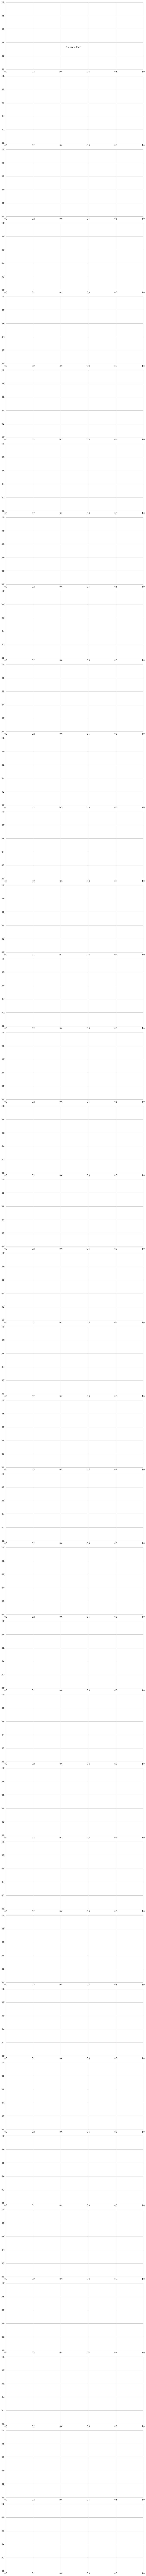

In [65]:
clustering.plot_ssv()

In [50]:
for period in periods:
    if np.isnan(period.fv).any():
        print('NAN')

In [68]:
print(clustering.n_clusters, len(clustering.labels))

35 350


In [71]:
print({len(cluster) for cluster in clustering.clusters})

{0}
